## Q.1. For the question in last week's lab, is the search direction a gradient descent one? Comment on that.



In [ ]:
# It is written in page

## Q2.Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (x1^2+x2−11)^2+(x1+x2^2−7)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.



Trajectory for fixed step size:
First Minimum Value point is: [2.9999999  2.00000025]
Second Minimum Value point is: [2.99811117 2.0045387 ]
Third Minimum Value point is: [2.99745015 2.006117  ]
Fourth Minimum Value point is: [2.99999939 2.00000148]


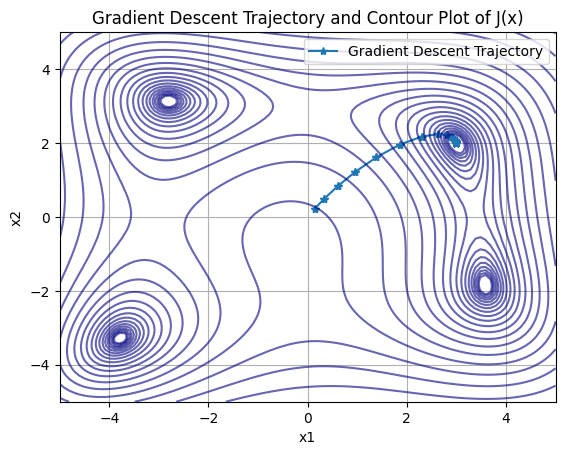

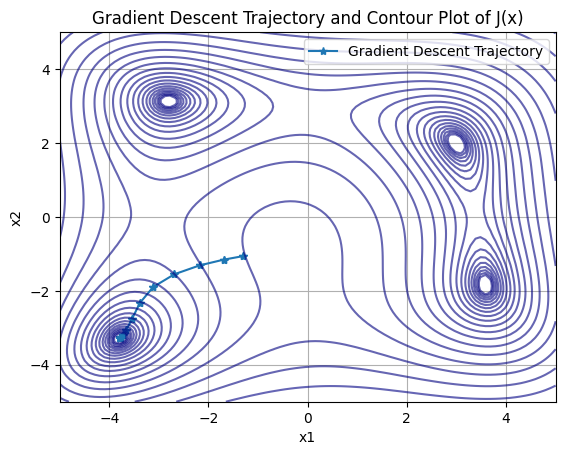

In [56]:
import numpy as np
import matplotlib.pyplot as plt

class Function:
    def __init__(self):
        pass
    
    def J(self, x):
        x1, x2 = x
        return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
    
    def grad_J(self, x):
        x1, x2 = x
        dJ_dx1 = 2 * (2 * x1 * (x1**2 + x2 - 11) + x1 + x2**2 - 7)
        dJ_dx2 = 2 * (x1**2 + 2 * x2 * (x1 + x2**2 - 7) + x2 - 11)
        return np.array([dJ_dx1, dJ_dx2])
        

# W_0 = starting point
def steepest_grad_descent_fixed(start_point, alpha, max_iteration = 1000, epsilon = 1e-5):
    function= Function()
    W_0 = start_point
    W_values = [] # list to save values of w1, w2, w3,...
    
    for i in range(max_iteration):
        grad = function.grad_J(W_0)
        W_next = W_0 - alpha*grad
        W_values.append(W_next)
        
        if np.linalg.norm(grad) < epsilon:
            break
            
        W_0 = W_next
        W_values.append(W_0) 
    return np.array(W_values)


# Plots of the intermediate steps in the iteration
def plot_w_values(W_values):
    fig, ax = plt.subplots()
    
    x1 = [point[0] for point in W_values]
    x2 = [point[1] for point in W_values]
    ax.plot(x1, x2, marker='*', linestyle='-', label='Gradient Descent Trajectory')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Gradient Descent Trajectory and Contour Plot of J(x)')
    ax.grid(True)
    
    # Generate grid points for contour plot
    x1_grid = np.linspace(-5, 5, 100)
    x2_grid = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1_grid, x2_grid)
    Z = (X1**2 + X2 - 11)**2 + (X1 + X2**2 - 7)**2
    
    # Plot contour lines of the function J(x)
    ax.contour(X1, X2, Z, levels=np.logspace(0, 5, 35), cmap='jet', alpha=0.6)
    
    ax.legend()
    
    plt.show()

initial_point = np.array([0, 0])
initial_point1 = np.array([-1, -1])
initial_point2 = np.array([-1, 1])
initial_point3 = np.array([3, -1])

alpha = 0.01
W_values_fixed = steepest_grad_descent_fixed(initial_point, alpha)
W_values_fixed1 = steepest_grad_descent_fixed(initial_point1, alpha)
W_values_fixed2 = steepest_grad_descent_fixed(initial_point2, alpha)
W_values_fixed3 = steepest_grad_descent_fixed(initial_point3, alpha)

print("Trajectory for fixed step size:")
l = len(W_values_fixed)
print('First Minimum Value point is:',W_values_fixed[l-1])

l1 = len(W_values_fixed1)
print('Second Minimum Value point is:',W_values_fixed[l1-1])

l2 = len(W_values_fixed2)
print('Third Minimum Value point is:',W_values_fixed[l2-1])

l3 = len(W_values_fixed3)
print('Fourth Minimum Value point is:',W_values_fixed[l3-1])

plot_w_values(W_values_fixed)
plot_w_values(W_values_fixed1)

In [83]:
class Function:
    def __init__(self):
        pass
    
    def J(self, x):
        x1, x2 = x
        return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
    
    def grad_J(self, x):
        x1, x2 = x
        dJ_dx1 = 2 * (2 * x1 * (x1**2 + x2 - 11) + x1 + x2**2 - 7)
        dJ_dx2 = 2 * (x1**2 + 2 * x2 * (x1 + x2**2 - 7) + x2 - 11)
        return np.array([dJ_dx1, dJ_dx2])
        

# bracketing_method to find alpha 
def bracketing_method(J, a, b, n):
    
    delta_w = (b - a) / n
    w1 = a
    w2 = a + delta_w
    w3 = a + 2 * delta_w

    # Step -2
    flag = 0
    while flag != 1:
        if J(w1) >= J(w2) <= J(w3):
            # print('alpha value lies between', w1, 'and', w3)
            flag = 1
        else:
            # Update points for the next iteration
            w1 = w2
            w2 = w3
            w3 = w3 + delta_w

        if w3 > b:
            print('No minimum exists between a, b')
            flag = 1
    alpha_1 = w1
    alpha_2 = w2
    return float(alpha_1+alpha_2)/2


a = 0
b = 1

def line_search(start_pt, max_iteration = 100, epsilon = 1e-5):
    function = Function()
    W_0 = start_pt
    W_values = [] # list to save values of w1, w2, w3,...
    
    for i in range(max_iteration):
        grad = function.grad_J(W_0)        
        fun = function.J(W_0)
        d = -grad
        
        # Univariate function
        J_val = lambda alpha: function.J(W_0 + alpha*d)
        alpha = bracketing_method(J_val,a,b,1000)
        
        print('value of alpha',i, 'is:',alpha)
        W_0 = W_0 - alpha*grad
        W_values.append(W_0)
        
        if np.linalg.norm(grad) < epsilon:
            break
            
    return np.array(W_values) 


value of alpha 0 is: 0.12650000000000008
value of alpha 1 is: 0.03950000000000003
value of alpha 2 is: 0.01750000000000001
value of alpha 3 is: 0.01850000000000001
value of alpha 4 is: 0.01850000000000001
value of alpha 5 is: 0.01850000000000001
value of alpha 6 is: 0.01850000000000001
value of alpha 7 is: 0.01850000000000001
value of alpha 8 is: 0.01850000000000001
value of alpha 9 is: 0.01850000000000001
value of alpha 10 is: 0.01950000000000001
value of alpha 11 is: 0.01750000000000001
value of alpha 12 is: 0.01950000000000001
value of alpha 13 is: 0.01750000000000001
value of alpha 14 is: 0.01950000000000001
value of alpha 15 is: 0.01750000000000001
value of alpha 16 is: 0.02050000000000001
value of alpha 17 is: 0.016500000000000008
value of alpha 18 is: 0.021500000000000012
value of alpha 19 is: 0.015500000000000007
value of alpha 20 is: 0.024500000000000015
value of alpha 21 is: 0.014500000000000006
value of alpha 22 is: 0.026500000000000017
Trajectory for fixed step size:
First 

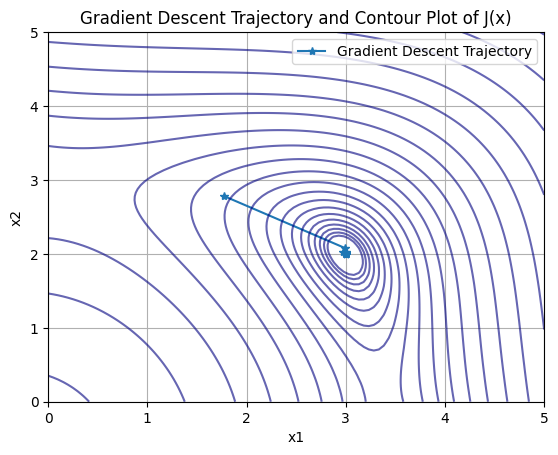

In [86]:
def plot_w_values(W_values):
    fig, ax = plt.subplots()
    
    x1 = [point[0] for point in W_values]
    x2 = [point[1] for point in W_values]
    ax.plot(x1, x2, marker='*', linestyle='-', label='Gradient Descent Trajectory')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Gradient Descent Trajectory and Contour Plot of J(x)')
    ax.grid(True)
    
    # Generate grid points for contour plot
    x1_grid = np.linspace(0, 5, 100)
    x2_grid = np.linspace(0, 5, 100)
    X1, X2 = np.meshgrid(x1_grid, x2_grid)
    Z = (X1**2 + X2 - 11)**2 + (X1 + X2**2 - 7)**2
    
    # Plot contour lines of the function J(x)
    ax.contour(X1, X2, Z, levels=np.logspace(0, 5, 35), cmap='jet', alpha=0.6)
    
    ax.legend()
    
    plt.show()


initial_point = np.array([0, 0])
W_values_fixed = line_search(initial_point)

print("Trajectory for fixed step size:")
l = len(W_values_fixed)
print('First Minimum Value point is:',W_values_fixed[l-1])
plot_w_values(W_values_fixed)